<a href="https://colab.research.google.com/github/luisfelipebp/regression-student-habits/blob/main/regression_student_habits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data-Science/Regressão/students-habits/student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [3]:
df['student_id'].value_counts()

,count
student_id,
S1999,1
S1000,1
S1001,1
S1002,1
S1003,1
...,...
S1012,1
S1011,1
S1010,1


In [4]:
df = df.drop('student_id', axis=1)

In [5]:
df['age'].value_counts()

,count
age,
20,146
24,134
17,133
21,125
23,119
18,117
19,113
22,113


In [6]:
df['gender'].value_counts()

,count
gender,
Female,481
Male,477
Other,42


In [7]:
df = df.drop(df.loc[df['gender'] == 'Other'].index)

In [8]:
df['study_hours_per_day'].value_counts()

,count
study_hours_per_day,
3.5,36
3.2,35
4.3,33
3.3,32
3.8,29
...,...
7.5,1
8.2,1
7.6,1


In [9]:
df['social_media_hours'].value_counts()

,count
social_media_hours,
3.1,37
2.1,35
2.4,33
3.2,33
2.9,33
3.0,32
1.9,31
2.2,31
2.8,30


In [10]:
df['netflix_hours'].value_counts()

,count
netflix_hours,
0.0,57
2.0,46
1.4,40
1.7,38
1.6,38
2.3,36
2.2,35
0.9,33
2.4,33


In [11]:
df['part_time_job'].value_counts()

,count
part_time_job,
No,753
Yes,205


In [12]:
df['attendance_percentage'].value_counts()

,count
attendance_percentage,
100.0,61
85.8,11
85.3,7
84.8,7
81.7,7
...,...
71.4,1
56.0,1
66.3,1


In [13]:
df['sleep_hours'].value_counts()

,count
sleep_hours,
6.5,38
6.1,36
6.2,35
6.7,32
7.1,31
...,...
9.2,1
9.8,1
3.2,1


In [14]:
df['diet_quality'].value_counts()

,count
diet_quality,
Fair,419
Good,364
Poor,175


In [15]:
df['exercise_frequency'].value_counts()

,count
exercise_frequency,
3,148
6,146
1,142
5,142
0,135
4,128
2,117


In [16]:
df['parental_education_level'].value_counts()

,count
parental_education_level,
High School,371
Bachelor,342
Master,160


In [17]:
df['internet_quality'].value_counts()

,count
internet_quality,
Good,425
Average,377
Poor,156


In [18]:
df['mental_health_rating'].value_counts()

,count
mental_health_rating,
4,106
6,104
8,101
1,100
3,99
10,96
5,95
2,89
7,85


In [19]:
df['extracurricular_participation'].value_counts()

,count
extracurricular_participation,
No,654
Yes,304


In [20]:
df['exam_score'].value_counts()

,count
exam_score,
100.0,47
65.6,7
80.9,7
74.0,7
75.4,6
...,...
94.0,1
86.9,1
31.1,1


In [21]:
df.isna().sum()

,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0
exercise_frequency,0


In [22]:
df['parental_education_level'].fillna(df['parental_education_level'].mode()[0], inplace=True)

In [23]:
df.isna().sum()

,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0
exercise_frequency,0


In [24]:
df.shape

(958, 15)

In [25]:
df.head(2)

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0


In [26]:
df['diet_quality'] = df['diet_quality'].replace({'Poor': 0, 'Fair': 1, 'Good': 2})
df['parental_education_level'] = df['parental_education_level'].replace({'High School': 0, 'Bachelor': 1, 'Master': 2})
df['internet_quality'] = df['internet_quality'].replace({'Poor': 0, 'Average': 1, 'Good': 2})

In [27]:
df2 = pd.DataFrame.copy(df)

In [28]:
df2.head(2)

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,1,6,2,1,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,2,6,0,1,8,No,100.0


In [29]:
df2

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,1,6,2,1,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,2,6,0,1,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,0,1,0,0,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,0,4,2,2,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,1,3,2,2,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,Female,2.6,0.5,1.6,No,77.0,7.5,1,2,0,2,6,Yes,76.1
996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,0,1,0,1,6,Yes,65.9
997,20,Male,3.0,2.6,1.3,No,61.9,6.5,2,5,1,2,9,Yes,64.4
998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,1,0,1,1,1,No,69.7


In [30]:
onehotencoder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [ 1, 5, 13])], remainder='passthrough')

In [31]:
transformed_data = onehotencoder.fit_transform(df)

In [32]:
feature_names = onehotencoder.get_feature_names_out()
df2 = pd.DataFrame(transformed_data, columns=feature_names)

In [33]:
df

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,1,6,2,1,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,2,6,0,1,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,0,1,0,0,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,0,4,2,2,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,1,3,2,2,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,Female,2.6,0.5,1.6,No,77.0,7.5,1,2,0,2,6,Yes,76.1
996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,0,1,0,1,6,Yes,65.9
997,20,Male,3.0,2.6,1.3,No,61.9,6.5,2,5,1,2,9,Yes,64.4
998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,1,0,1,1,1,No,69.7


In [34]:
X = df2.drop('remainder__exam_score', axis=1).values

In [35]:
y = df2['remainder__exam_score'].values

In [36]:
X.shape

(958, 17)

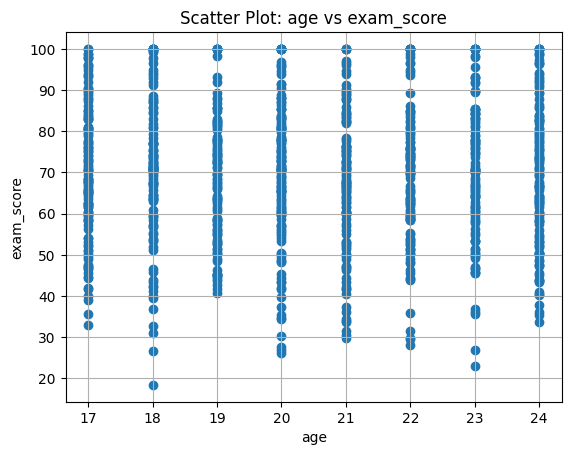

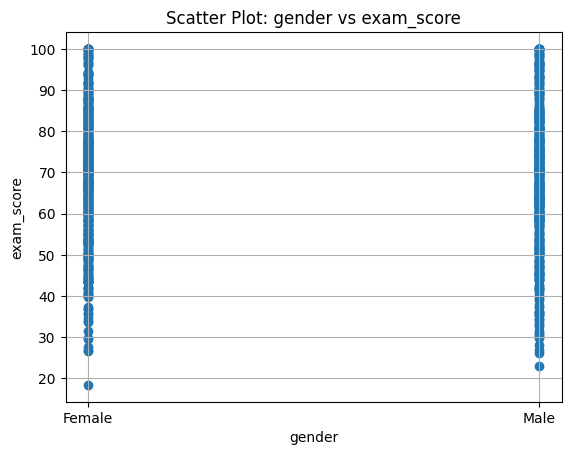

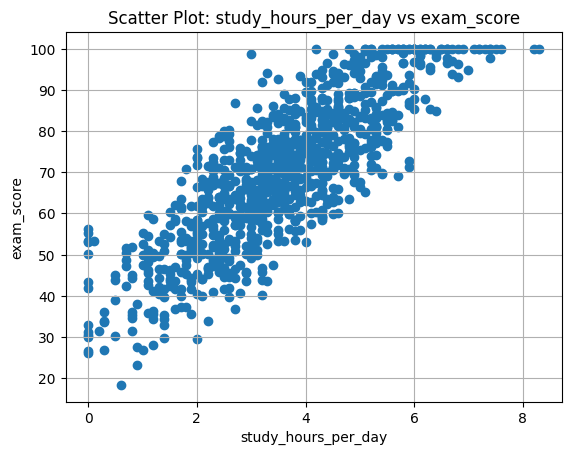

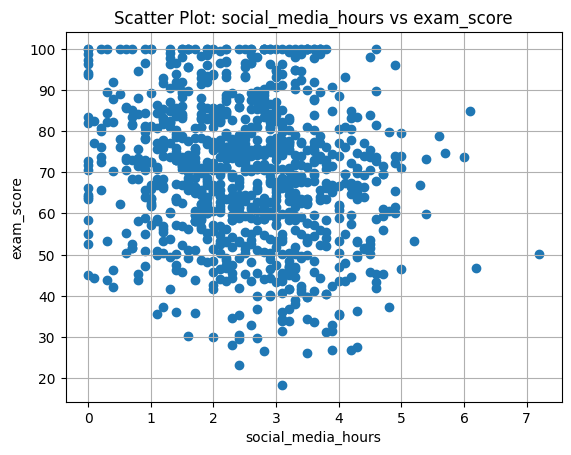

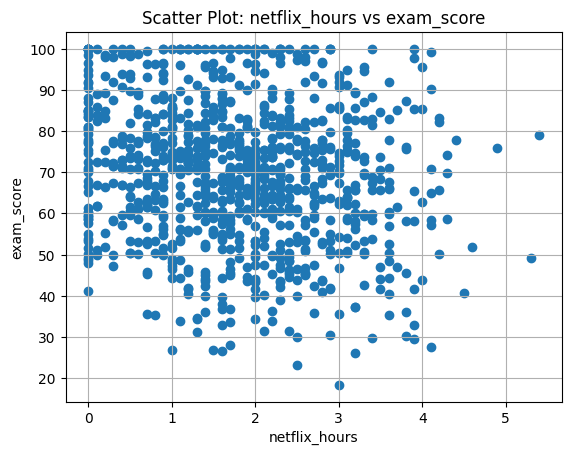

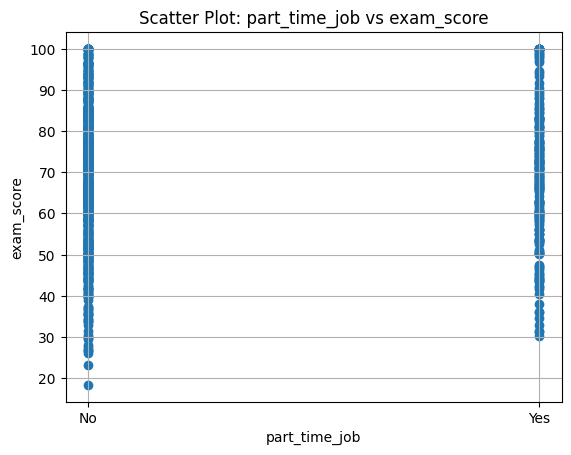

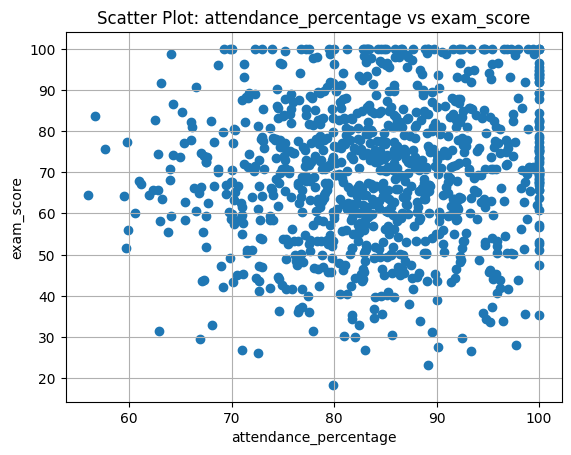

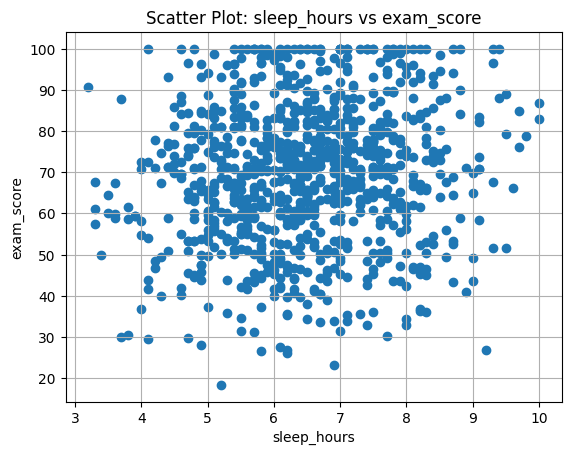

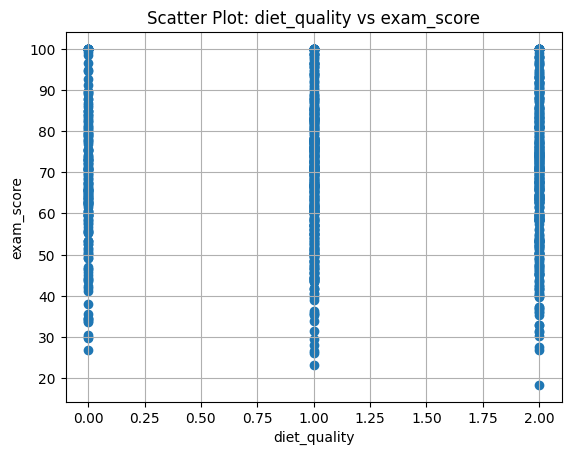

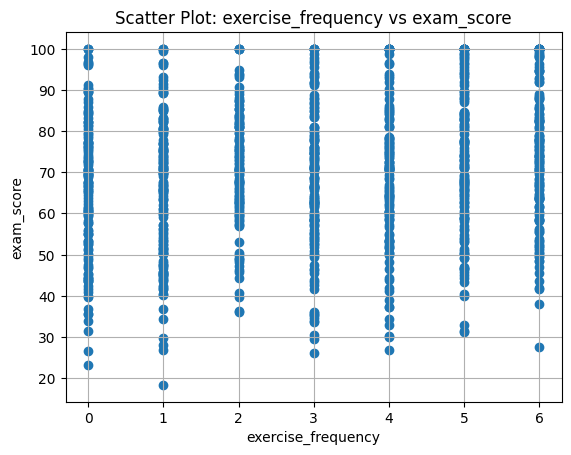

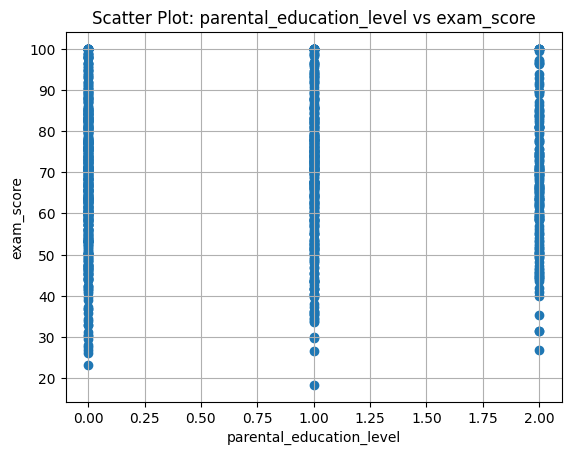

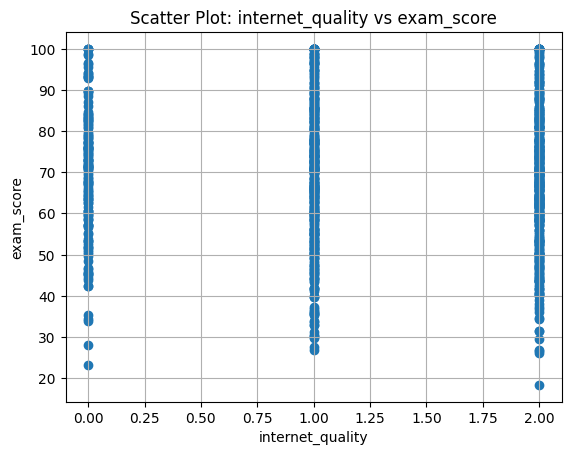

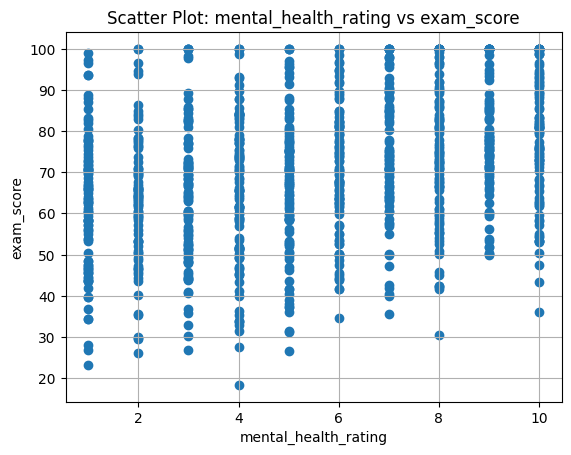

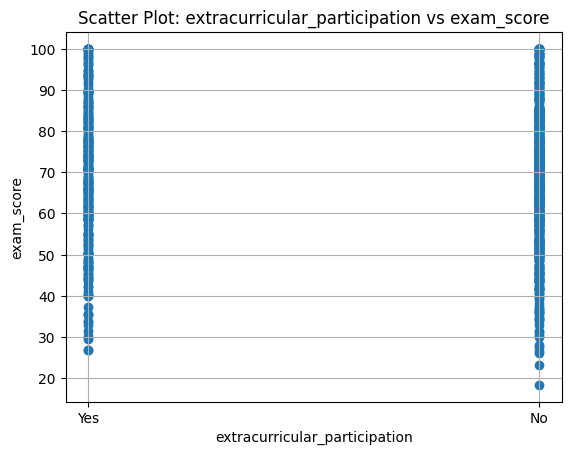

In [37]:
target_variable = 'exam_score'

feature_columns = [col for col in df.columns if col != target_variable]

for col in feature_columns:
    plt.scatter(df[col], df[target_variable])
    plt.title(f'Scatter Plot: {col} vs {target_variable}')
    plt.xlabel(col)
    plt.ylabel(target_variable)
    plt.grid(True)
    plt.show()

In [38]:
import scipy.stats as stats

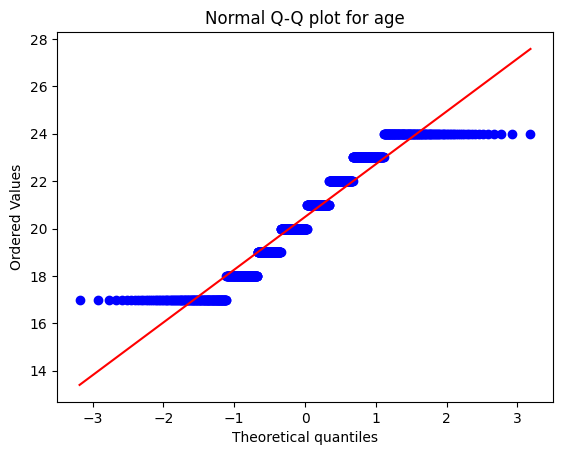

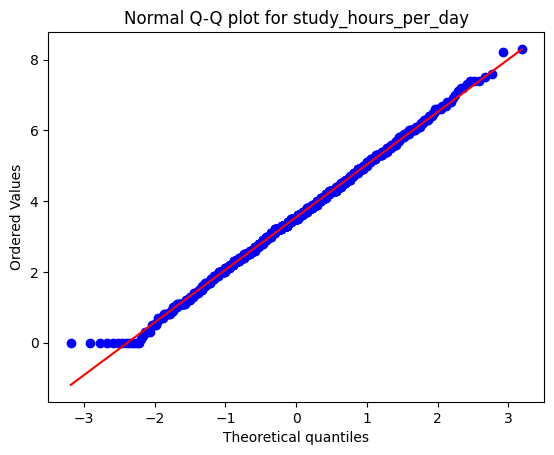

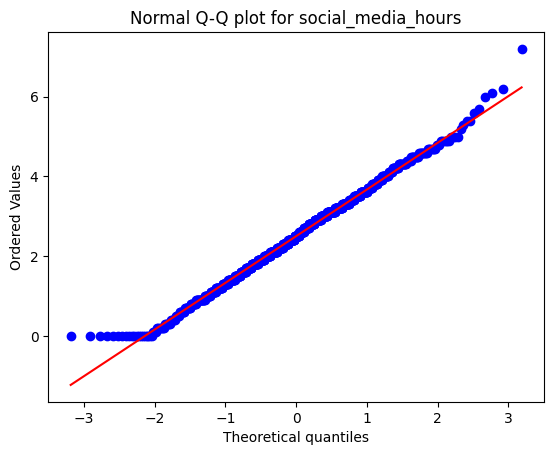

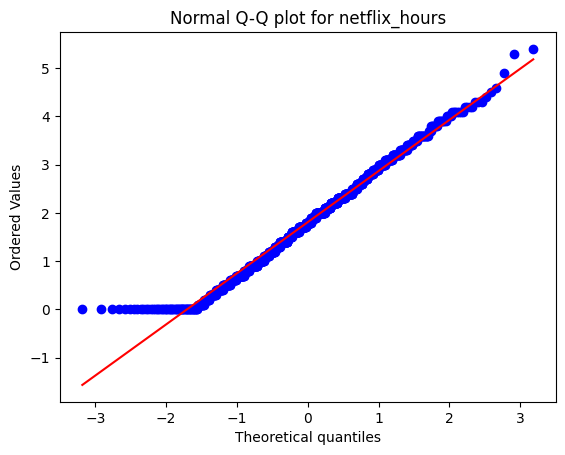

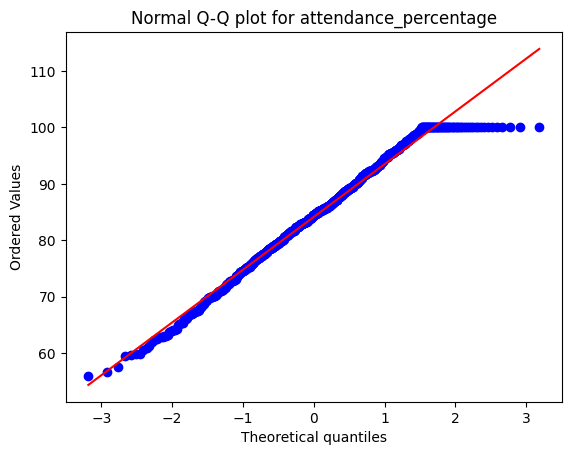

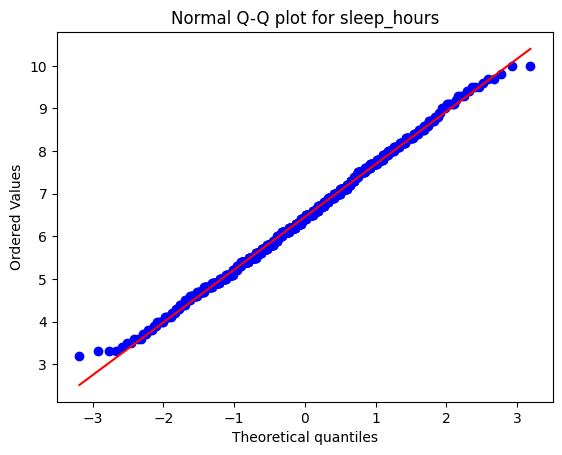

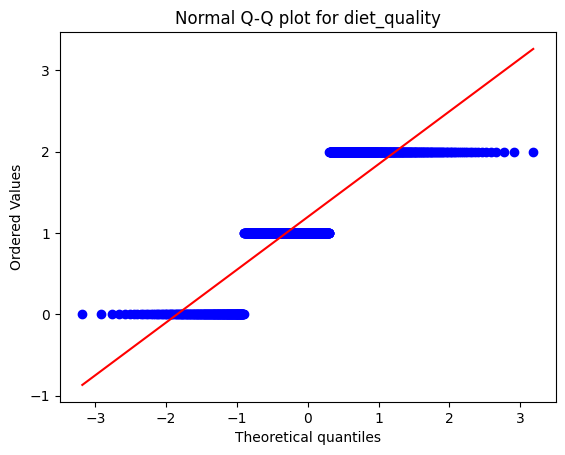

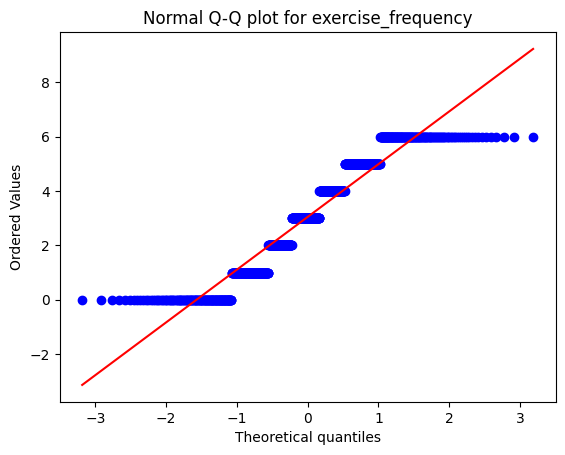

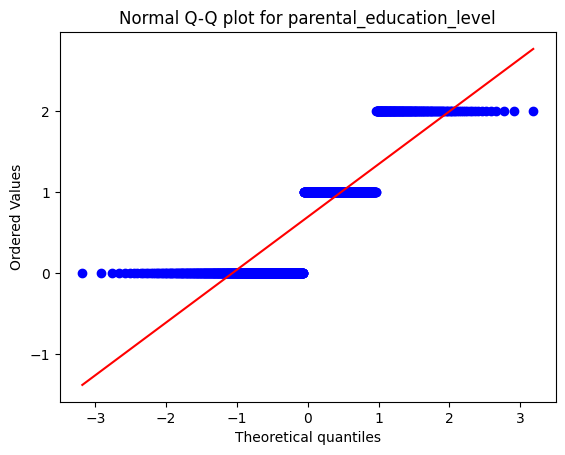

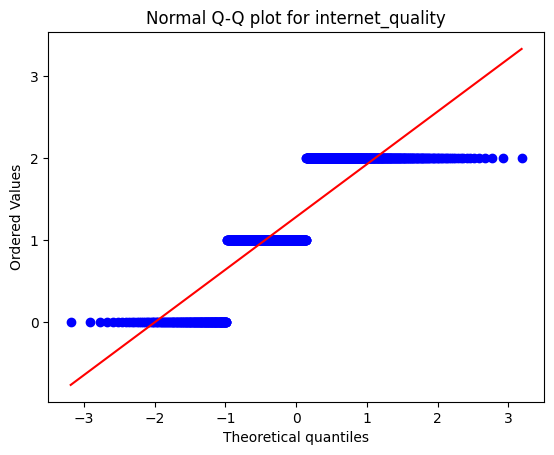

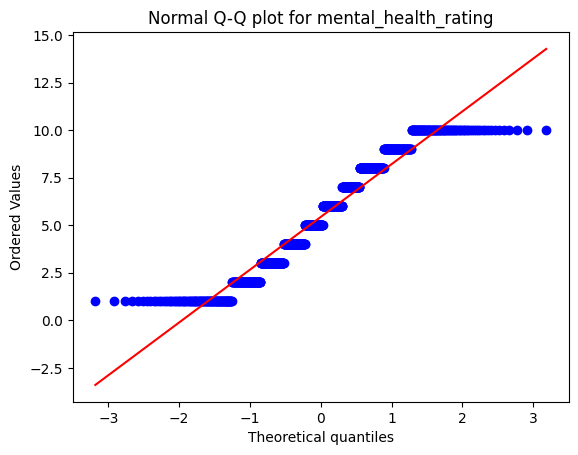

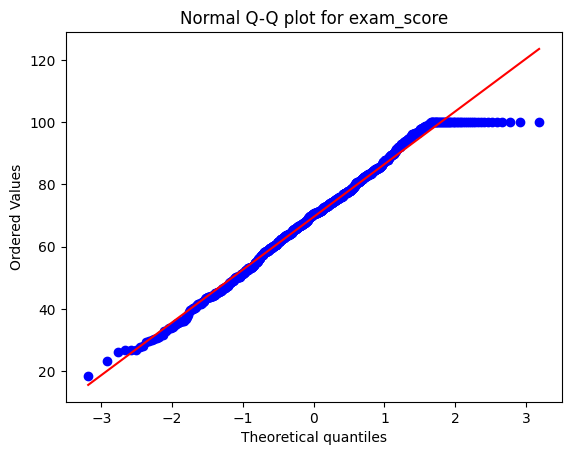

In [39]:
import scipy.stats as stats
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"Normal Q-Q plot for {col}")
    plt.show()

**Teste Shapiro-Wilk**

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [40]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors
import scipy.stats as stats

In [41]:
df_columns = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'mental_health_rating',  'internet_quality', 'exam_score']

In [42]:
for col in df_columns:
    estatistica, p = stats.shapiro(df[col])

    print(f"Análise de Normalidade para a coluna: '{col}'")
    print(f"  -> Estatística do teste: {estatistica:.3f}")
    print(f"  -> p-valor: {p:.4f}")

    if p > 0.05:
        print(f"  => Conclusão: A distribuição é considerada NORMAL (p > 0.05).")
    else:
        print(f"  => Conclusão: A distribuição é considerada NÃO-NORMAL (p <= 0.05).")

    print("-" * 40)

Análise de Normalidade para a coluna: 'age'
  -> Estatística do teste: 0.925
  -> p-valor: 0.0000
  => Conclusão: A distribuição é considerada NÃO-NORMAL (p <= 0.05).
----------------------------------------
Análise de Normalidade para a coluna: 'study_hours_per_day'
  -> Estatística do teste: 0.997
  -> p-valor: 0.0935
  => Conclusão: A distribuição é considerada NORMAL (p > 0.05).
----------------------------------------
Análise de Normalidade para a coluna: 'social_media_hours'
  -> Estatística do teste: 0.994
  -> p-valor: 0.0009
  => Conclusão: A distribuição é considerada NÃO-NORMAL (p <= 0.05).
----------------------------------------
Análise de Normalidade para a coluna: 'netflix_hours'
  -> Estatística do teste: 0.983
  -> p-valor: 0.0000
  => Conclusão: A distribuição é considerada NÃO-NORMAL (p <= 0.05).
----------------------------------------
Análise de Normalidade para a coluna: 'attendance_percentage'
  -> Estatística do teste: 0.983
  -> p-valor: 0.0000
  => Conclusão: 

**Correlação Linear**

Ho = não há corrrelação linear: p > 0,05

Ha = existe correlação linear: p <= 0,05

In [43]:
print('Teste de Correlação utilizando Spearman')
print("*" * 50)

for col in df_columns:
    coef, p = stats.spearmanr(df['exam_score'], df[col])

    print(f"Analisando a correlação para: '{col}'")
    if p > 0.05:
        print(f'-> Não há evidência de correlação significativa.')
    else:
        if coef > 0:
            print(f'-> Há uma correlação POSITIVA e significativa.')
        else:
            print(f'-> Há uma correlação NEGATIVA e significativa.')

    print('   Coeficiente de Spearman: {:.3f}'.format(coef))
    print('   p-valor: {:.4f}'.format(p))
    print("-" * 30)

Teste de Correlação utilizando Spearman
**************************************************
Analisando a correlação para: 'age'
-> Não há evidência de correlação significativa.
   Coeficiente de Spearman: -0.020
   p-valor: 0.5329
------------------------------
Analisando a correlação para: 'study_hours_per_day'
-> Há uma correlação POSITIVA e significativa.
   Coeficiente de Spearman: 0.812
   p-valor: 0.0000
------------------------------
Analisando a correlação para: 'social_media_hours'
-> Há uma correlação NEGATIVA e significativa.
   Coeficiente de Spearman: -0.161
   p-valor: 0.0000
------------------------------
Analisando a correlação para: 'netflix_hours'
-> Há uma correlação NEGATIVA e significativa.
   Coeficiente de Spearman: -0.153
   p-valor: 0.0000
------------------------------
Analisando a correlação para: 'attendance_percentage'
-> Há uma correlação POSITIVA e significativa.
   Coeficiente de Spearman: 0.102
   p-valor: 0.0016
------------------------------
Analisando

In [44]:
correlacoes =  df.corr(numeric_only=True, method='spearman')

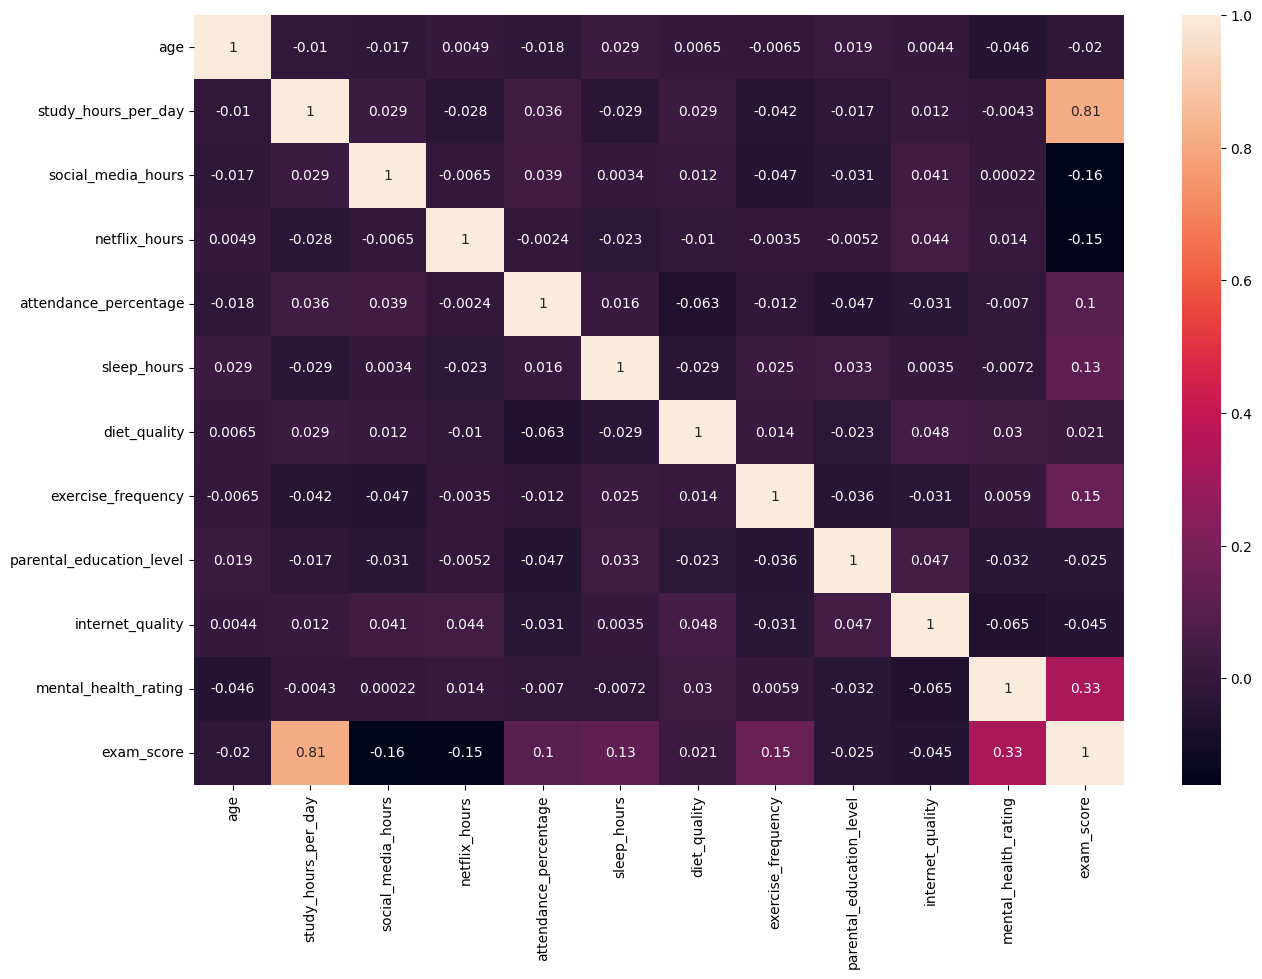

In [45]:
plt.figure(figsize=(15,10))
sns.heatmap(correlacoes, annot=True);

In [46]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=77)

In [47]:
x_treino.shape

(766, 17)

In [48]:
x_teste.shape

(192, 17)

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

def model_train(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)

    y_predict = model.predict(x_test)

    r2_treino = model.score(x_train, y_train)
    r2_teste = model.score(x_test,y_test)
    rmse_teste = np.sqrt(mean_squared_error(y_test, y_predict))

    print("Métricas de Avaliação do Modelo:")
    print(f"  -> R² Score (Treino): {r2_treino:.4f}")
    print(f"  -> R² Score (Teste):  {r2_teste:.4f}")
    print(f"  -> RMSE (Teste):      {rmse_teste:.4f}")

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

def model_train_scaler(model, x_train, x_test, y_train, y_test):
    scaler = StandardScaler()

    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    model.fit(x_train_scaled, y_train)

    y_predict = model.predict(x_test_scaled)

    r2_treino = model.score(x_train_scaled, y_train)
    r2_teste = model.score(x_test_scaled,y_test)
    rmse_teste = np.sqrt(mean_squared_error(y_test,y_predict))

    print("Métricas de Avaliação do Modelo com StandardScaler:")
    print(f"  -> R² Score (Treino): {r2_treino:.4f}")
    print(f"  -> R² Score (Teste):  {r2_teste:.4f}")
    print(f"  -> RMSE (Teste):      {rmse_teste:.4f}")

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

def cros_validation(splits, model, x, y):
    kfold = KFold(n_splits = splits, shuffle=True, random_state = 77)
    scores = cross_val_score(model, x, y, cv=kfold)

    print("Coeficiente de Determinação médio: %.2f%%" % (scores.mean() * 100.0))

In [52]:
from sklearn.linear_model import LinearRegression

In [120]:
req_linear_mult = LinearRegression()
model_train(req_linear_mult, x_treino, x_teste, y_treino, y_teste)

Métricas de Avaliação do Modelo:
  -> R² Score (Treino): 0.8963
  -> R² Score (Teste):  0.9207
  -> RMSE (Teste):      5.1222


In [121]:
model_train_scaler(req_linear_mult, x_treino, x_teste, y_treino, y_teste)

Métricas de Avaliação do Modelo com StandardScaler:
  -> R² Score (Treino): 0.8963
  -> R² Score (Teste):  0.9207
  -> RMSE (Teste):      5.1222


In [122]:
cros_validation(10, req_linear_mult, X, y)

Coeficiente de Determinação médio: 89.75%


In [123]:
from sklearn.svm import SVR

In [124]:
svr = SVR(kernel='linear')
model_train(svr, x_treino, x_teste, y_treino, y_teste)

Métricas de Avaliação do Modelo:
  -> R² Score (Treino): 0.8941
  -> R² Score (Teste):  0.9227
  -> RMSE (Teste):      5.0586


In [115]:
model_train_scaler(svr, x_treino, x_teste, y_treino, y_teste)

Métricas de Avaliação do Modelo com StandardScaler:
  -> R² Score (Treino): 0.8945
  -> R² Score (Teste):  0.9223
  -> RMSE (Teste):      5.0725


In [116]:
cros_validation(10, svr, X, y)

Coeficiente de Determinação médio: 89.55%


In [60]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
decision_tree = DecisionTreeRegressor(max_depth=6, random_state=77)
model_train(decision_tree, x_treino, x_teste, y_treino, y_teste)

Métricas de Avaliação do Modelo:
  -> R² Score (Treino): 0.8801
  -> R² Score (Teste):  0.7820
  -> RMSE (Teste):      8.4940


In [62]:
cros_validation(10, decision_tree, X, y)

Coeficiente de Determinação médio: 73.05%


In [63]:
from sklearn.ensemble import RandomForestRegressor

In [112]:
random_forest = RandomForestRegressor(n_estimators=200, criterion='squared_error', max_depth=8, random_state = 7)
model_train(random_forest, x_treino, x_teste, y_treino, y_teste)

Métricas de Avaliação do Modelo:
  -> R² Score (Treino): 0.9630
  -> R² Score (Teste):  0.8769
  -> RMSE (Teste):      6.3823


In [113]:
cros_validation(10, random_forest, X, y)

Coeficiente de Determinação médio: 85.45%


In [80]:
from xgboost import XGBRegressor

In [110]:
xgboost = XGBRegressor(n_estimators=250, max_depth=4, learning_rate=0.05, objective="reg:squarederror", random_state=7)
model_train(xgboost, x_treino, x_teste, y_treino, y_teste)

Métricas de Avaliação do Modelo:
  -> R² Score (Treino): 0.9732
  -> R² Score (Teste):  0.8987
  -> RMSE (Teste):      5.7910


In [111]:
cros_validation(10, xgboost, X, y)

Coeficiente de Determinação médio: 88.14%


In [125]:
import lightgbm as lgb

In [155]:
lgbm = lgb.LGBMRegressor(num_leaves=55, max_depth=8, learning_rate=0.2, n_estimators=50, random_state=7,verbose=-1)
model_train(lgbm, x_treino, x_teste, y_treino, y_teste)

Métricas de Avaliação do Modelo:
  -> R² Score (Treino): 0.9812
  -> R² Score (Teste):  0.8933
  -> RMSE (Teste):      5.9417


In [156]:
cros_validation(10, lgbm, X, y)

Coeficiente de Determinação médio: 86.92%


In [158]:
! pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.8 MB/s eta 0:00:00


In [159]:
from catboost.core import CatBoostRegressor

In [193]:
catboost = CatBoostRegressor (iterations=350, learning_rate=0.06, depth = 4, random_state = 7, verbose=False)
model_train(catboost, x_treino, x_teste, y_treino, y_teste)

Métricas de Avaliação do Modelo:
  -> R² Score (Treino): 0.9537
  -> R² Score (Teste):  0.9215
  -> RMSE (Teste):      5.0957


In [194]:
cros_validation(10, catboost, X, y)

Coeficiente de Determinação médio: 89.65%


In [196]:
from sklearn.neural_network import MLPRegressor

In [225]:
reg_neural = MLPRegressor(hidden_layer_sizes=(100, 150), activation='relu', verbose=False, batch_size=128, solver='adam', random_state = 7)
model_train_scaler(reg_neural, x_treino, x_teste, y_treino, y_teste)

Métricas de Avaliação do Modelo com StandardScaler:
  -> R² Score (Treino): 0.9233
  -> R² Score (Teste):  0.8688
  -> RMSE (Teste):      6.5890


In [226]:
cros_validation(10, reg_neural, X, y)

Coeficiente de Determinação médio: 89.50%
